In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('Social_Network_Ads.csv')

In [34]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [35]:
df.isnull().sum()    

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

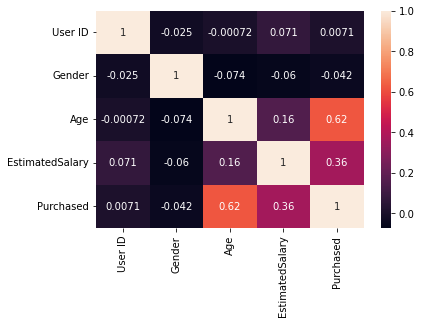

In [68]:
sns.heatmap(df.corr(), annot=True)

In [36]:
df['Gender'].replace(['Female','Male'], [0,1], inplace=True)

<AxesSubplot:xlabel='EstimatedSalary'>

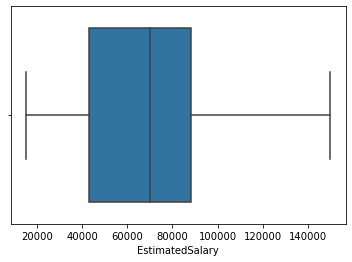

In [37]:
sns.boxplot(x=df['EstimatedSalary'])

<AxesSubplot:xlabel='Age'>

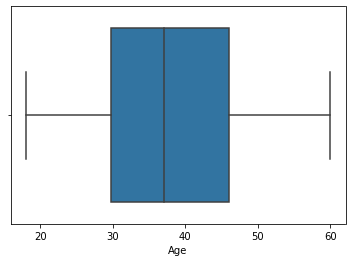

In [38]:
sns.boxplot(x=df['Age'])

In [39]:
cols = ['Age', 'EstimatedSalary']
x = df[cols]
#x = df.iloc[:, 2:4].values
y = df['Purchased']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
#Training the logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(x_train, y_train)

LogisticRegression()

In [48]:
y_pred = lm.predict(x_test)

In [49]:
y_test

51     0
153    0
159    1
224    0
113    0
      ..
167    0
245    1
123    0
111    0
316    1
Name: Purchased, Length: 80, dtype: int64

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_pred, y_test), precision_score(y_pred, y_test), recall_score(y_pred, y_test)

(0.8875, 0.75, 0.9130434782608695)

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [60]:
TP = cm[0,0]
TN = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

accuracy = (TP+TN)/(TP+FN+TN+FP)
error_rate = 1 - accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)

print("Accuracy : ", accuracy)
print("Error Rate : ", error_rate)
print("Precision : ", precision)
print("Recall : ", recall)

Accuracy :  0.8875
Error Rate :  0.11250000000000004
Precision :  0.9615384615384616
Recall :  0.8771929824561403


In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

In [62]:
accuracy = (TP+TN)/(TP+FN+TN+FP)
print(accuracy)

0.8875


In [63]:
error_rate = 1-accuracy
error_rate

0.11250000000000004

In [65]:
percision = (TP)/(TP+TN)
precision

0.9615384615384616

In [66]:
recall = TP/(TP+FN)

In [67]:
recall

0.8771929824561403